# M.Tech Dissertation Project
## Terrorist threat & link prediction system: Analysis & prediction of terrorist attack pattern and unrevealed hidden Links between terrorist's network 

##### Importing Libraries 

In [2]:
#Importing the required libraries for EDA (Exploratory data analysis)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
plt.style.use('fivethirtyeight')
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


##### Loading Preprocessed CSV File 

##### Loading the data into the data frame.

In [3]:
df = pd.read_csv("globalterrorismdb_0221dist_PreProcessed.csv")

df=df[['Year','Month','Day','Country_Code','Country_Name','Region_Code','Region_Name','City','AttackType_Code','AttackType_Name','Targtype_Code','Targtype_Name','Group_Name','Weaptype1_Code','Weaptype1_Name','Killed','Wounded']]

df.head(10)
# To display the top 5 rows 
#df.head(5)            

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,MANO-D,13,Firearms,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Explosives,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Manila,1,Assassination,10,Journalists & Media,New People's Army (NPA),13,Firearms,1.0,0.0
3,1970,1,0,78,Greece,8,Western Europe,Athens,3,Bombing/Explosion,7,Government (Diplomatic),Irish Republican Army (IRA),6,Explosives,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Uighur Separatists,8,Incendiary,NaN,NaN
5,1970,1,1,217,United States,1,North America,Cairo,2,Armed Assault,3,Police,Black Nationalists,5,Firearms,0.0,0.0
6,1970,1,2,218,Uruguay,3,South America,Montevideo,1,Assassination,3,Police,Tupamaros (Uruguay),5,Firearms,0.0,0.0
7,1970,1,2,217,United States,1,North America,Oakland,3,Bombing/Explosion,21,Utilities,Anti-Abortion extremists,6,Explosives,0.0,0.0
8,1970,1,2,217,United States,1,North America,Madison,7,Facility/Infrastructure Attack,4,Military,New Year's Gang,8,Incendiary,0.0,0.0
9,1970,1,3,217,United States,1,North America,Madison,7,Facility/Infrastructure Attack,2,Government (General),New Year's Gang,8,Incendiary,0.0,0.0


##### Checking Column Heading

In [4]:
df.keys()

Index(['Year', 'Month', 'Day', 'Country_Code', 'Country_Name', 'Region_Code',
       'Region_Name', 'City', 'AttackType_Code', 'AttackType_Name',
       'Targtype_Code', 'Targtype_Name', 'Group_Name', 'Weaptype1_Code',
       'Weaptype1_Name', 'Killed', 'Wounded'],
      dtype='object')

##### Checking the types of data

In [5]:
df.dtypes

Year                 int64
Month                int64
Day                  int64
Country_Code         int64
Country_Name        object
Region_Code          int64
Region_Name         object
City                object
AttackType_Code      int64
AttackType_Name     object
Targtype_Code        int64
Targtype_Name       object
Group_Name          object
Weaptype1_Code       int64
Weaptype1_Name      object
Killed             float64
Wounded            float64
dtype: object

In [6]:
df.head(10)

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,MANO-D,13,Firearms,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Explosives,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Manila,1,Assassination,10,Journalists & Media,New People's Army (NPA),13,Firearms,1.0,0.0
3,1970,1,0,78,Greece,8,Western Europe,Athens,3,Bombing/Explosion,7,Government (Diplomatic),Irish Republican Army (IRA),6,Explosives,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Uighur Separatists,8,Incendiary,NaN,NaN
5,1970,1,1,217,United States,1,North America,Cairo,2,Armed Assault,3,Police,Black Nationalists,5,Firearms,0.0,0.0
6,1970,1,2,218,Uruguay,3,South America,Montevideo,1,Assassination,3,Police,Tupamaros (Uruguay),5,Firearms,0.0,0.0
7,1970,1,2,217,United States,1,North America,Oakland,3,Bombing/Explosion,21,Utilities,Anti-Abortion extremists,6,Explosives,0.0,0.0
8,1970,1,2,217,United States,1,North America,Madison,7,Facility/Infrastructure Attack,4,Military,New Year's Gang,8,Incendiary,0.0,0.0
9,1970,1,3,217,United States,1,North America,Madison,7,Facility/Infrastructure Attack,2,Government (General),New Year's Gang,8,Incendiary,0.0,0.0


In [7]:
df.shape

(201183, 17)

##### Dropping the duplicate rows

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (14993, 17)


In [9]:
df = df.drop_duplicates()
#df.head(5)

In [10]:
df.count()      # Used to count the number of rows

Year               186190
Month              186190
Day                186190
Country_Code       186190
Country_Name       186190
Region_Code        186190
Region_Name        186190
City               185786
AttackType_Code    186190
AttackType_Name    186190
Targtype_Code      186190
Targtype_Name      186190
Group_Name         186190
Weaptype1_Code     186190
Weaptype1_Name     186190
Killed             175609
Wounded            168931
dtype: int64

##### Dropping the missing or null values.

In [11]:
print(df.isnull().sum())

Year                   0
Month                  0
Day                    0
Country_Code           0
Country_Name           0
Region_Code            0
Region_Name            0
City                 404
AttackType_Code        0
AttackType_Name        0
Targtype_Code          0
Targtype_Name          0
Group_Name             0
Weaptype1_Code         0
Weaptype1_Name         0
Killed             10581
Wounded            17259
dtype: int64


In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

Year               167880
Month              167880
Day                167880
Country_Code       167880
Country_Name       167880
Region_Code        167880
Region_Name        167880
City               167880
AttackType_Code    167880
AttackType_Name    167880
Targtype_Code      167880
Targtype_Name      167880
Group_Name         167880
Weaptype1_Code     167880
Weaptype1_Name     167880
Killed             167880
Wounded            167880
dtype: int64

In [13]:
print(df.isnull().sum())   # After dropping the values again checking for null values

Year               0
Month              0
Day                0
Country_Code       0
Country_Name       0
Region_Code        0
Region_Name        0
City               0
AttackType_Code    0
AttackType_Name    0
Targtype_Code      0
Targtype_Name      0
Group_Name         0
Weaptype1_Code     0
Weaptype1_Name     0
Killed             0
Wounded            0
dtype: int64


##### Data Visualization 

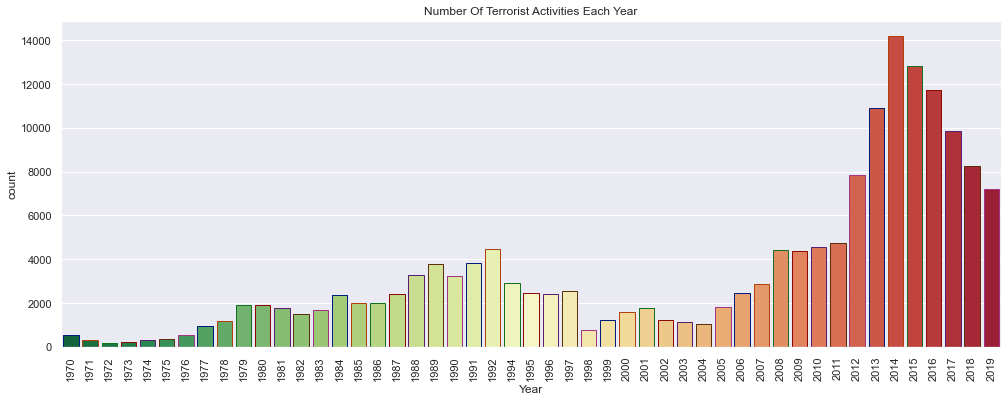

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

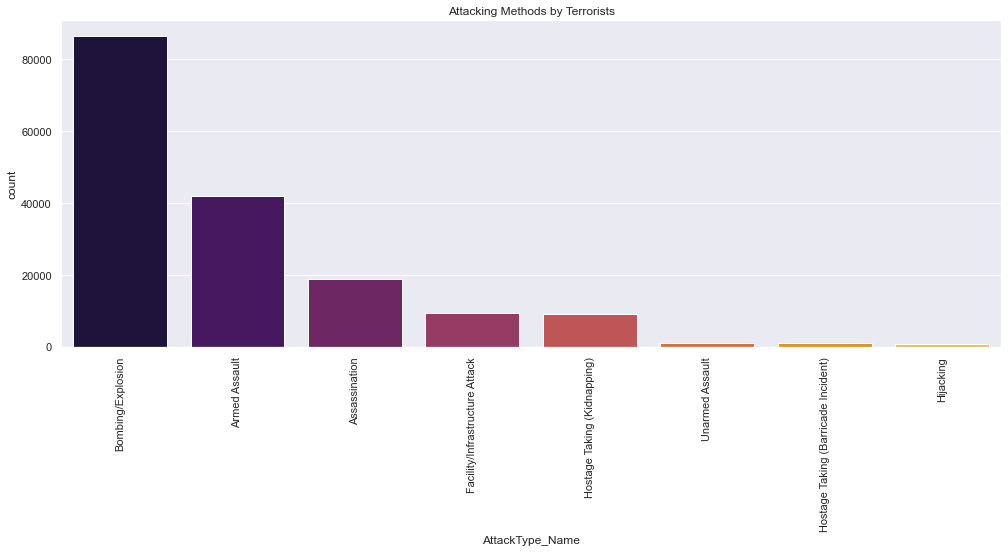

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType_Name',data=df,palette='inferno',order=df['AttackType_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

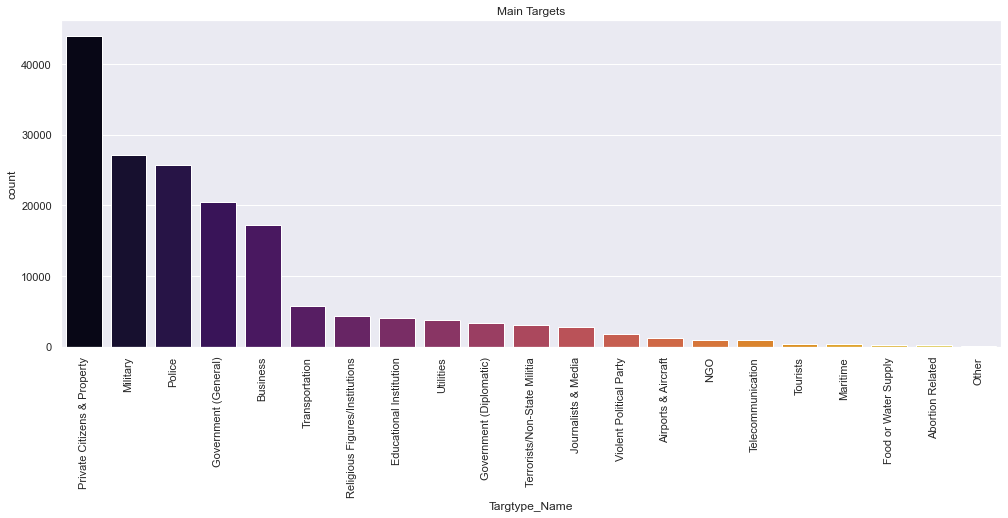

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Targtype_Name'],palette='inferno',order=df['Targtype_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Main Targets')
plt.show()

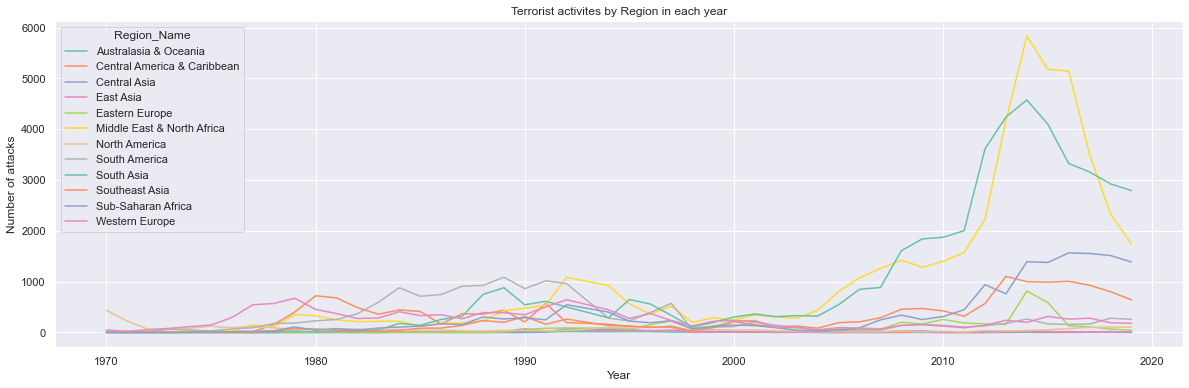

In [17]:
terror_region=pd.crosstab(df.Year,df.Region_Name)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

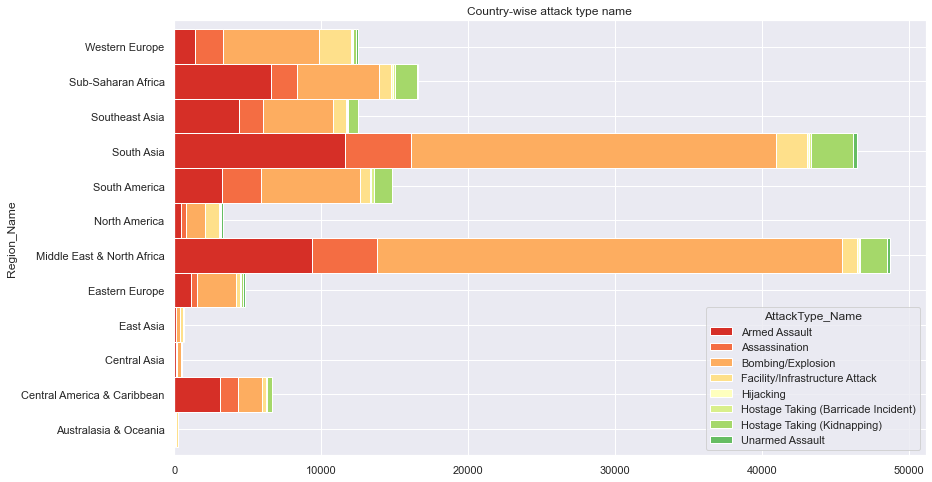

In [18]:
pd.crosstab(df.Region_Name,df.AttackType_Name).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Country-wise attack type name')
plt.show()

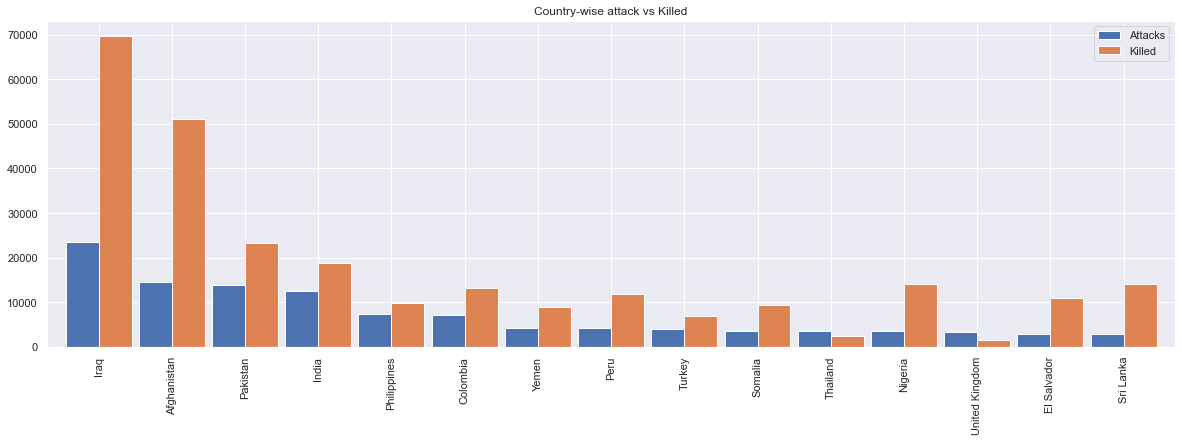

In [19]:
coun_terror=df['Country_Name'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country_Name')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Country-wise attack vs Killed')
plt.show()

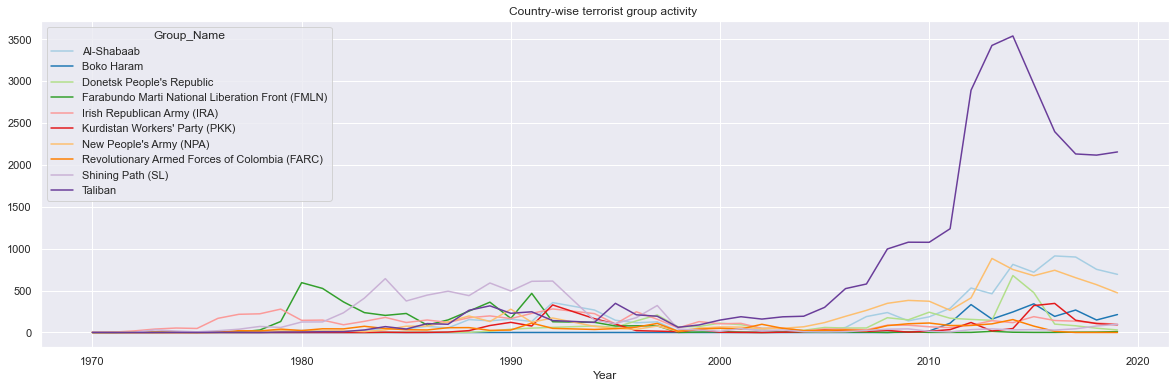

In [20]:
top_groups10=df[df['Group_Name'].isin(df['Group_Name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group_Name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Country-wise terrorist group activity ')
plt.show()

#### Objectives

In [21]:
#country = input("Enter Country Name: ")
#country = country.capitalize()
country = 'India'
print("terrorism risk in percentage for every months for", country,"specific input country")
months = dict(df[df.Country_Name == country].groupby(['Month']).size())
months = dict(sorted(months.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
tot = sum(list(months.values()))
#print("Entered Country: ",country)
for i in months:
    print(i,' {:.2f} %'.format((months[i]/tot)*100))
    
 #It will print terrorism risk in percentage for every months for specific input country.   


terrorism risk in percentage for every months for India specific input country
5  9.87 %
4  9.76 %
8  9.42 %
6  8.88 %
7  8.80 %
10  8.39 %
11  8.37 %
1  8.30 %
3  7.55 %
9  7.03 %
12  6.88 %
2  6.77 %


In [22]:
#Used to convert classes into numeric form
label_encoder = preprocessing.LabelEncoder()
df['Group_Name']= label_encoder.fit_transform(df['Group_Name'])
df['Wounded']= label_encoder.fit_transform(df['Wounded'])
df['Killed']= label_encoder.fit_transform(df['Killed'])

In [23]:
#Implemented KNN Algorithm with graph of accuracy vs k value from 1 to 30
def call_knn(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 41)
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    graph = {}
    for i in range(1,31):
    
        classifier = KNeighborsClassifier(n_neighbors = i)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        ac = accuracy_score(y_test,y_pred)
        graph[i] = ac*100
    
    plt.plot(list(graph.keys()), list(graph.values()),color='blue', marker='o')
    plt.title('Key Value Graph')
    plt.xlabel('Key Values')
    plt.ylabel('Accuracy (%)')
    plt.show()

    max_key = max(graph, key=graph.get)
    print("We got Maximum Accuracy of",graph[max_key],'% at k = ',max_key)

In [24]:
#Implemented Random Forest Algorithm with given estimators
def call_random(X,y,e):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 41)


    ss = StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    classifier= RandomForestClassifier(n_estimators= e)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print("We got Accuracy of",ac*100,'%')
    

In [25]:
df.describe()

,Year,Month,Day,Country_Code,Region_Code,AttackType_Code,Targtype_Code,Group_Name,Weaptype1_Code,Killed,Wounded
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,2005.074619,6.461705,15.546503,127.455742,7.298308,3.218716,8.309614,1877.021712,6.413611,2.207881,3.031862
std,12.793597,3.388848,8.803819,103.989913,2.838773,1.934905,6.526960,951.321210,2.148168,6.860310,10.718181
min,1970.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1994.000000,4.000000,8.000000,81.000000,6.000000,2.000000,3.000000,1373.000000,5.000000,0.000000,0.000000
50%,2011.000000,6.000000,15.000000,98.000000,6.000000,3.000000,4.000000,1541.000000,6.000000,1.000000,0.000000
75%,2015.000000,9.000000,23.000000,160.000000,10.000000,3.000000,14.000000,2915.000000,6.000000,2.000000,2.000000
max,2019.000000,12.000000,31.000000,1004.000000,12.000000,9.000000,22.000000,3491.000000,13.000000,183.000000,240.000000


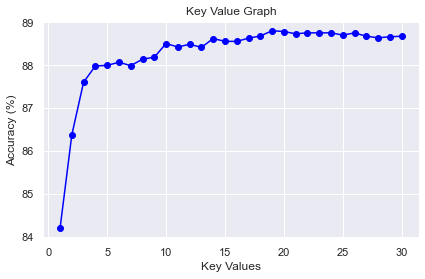

We got Maximum Accuracy of 88.8015248987372 % at k =  19


In [26]:
#will predict the weapon type will be used in attack based on specific input data.
X = df.iloc[:,[3,8,10]].values
y = df.iloc[:, 13].values

call_knn(X,y)

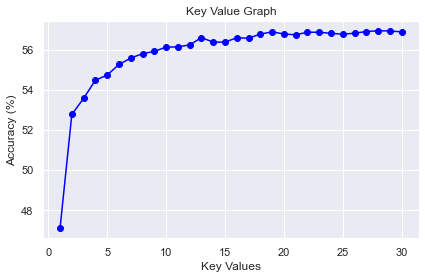

We got Maximum Accuracy of 56.93650226352156 % at k =  28


In [28]:
#Will predict loss of life based on input data.
X = df.iloc[:,[0,3,8,10,12,13]].values
y = df.iloc[:, 15].values

call_knn(X,y)

In [1]:
#will predict the organisation behind the attack based on specific input data.
X = df.iloc[:,[0,3,8,10,13]].values
y = df.iloc[:, 12].values

call_random(X,y,10)

NameError: name 'df' is not defined

In [46]:
df.dtypes

Year                int64
Month               int64
Day                 int64
Country_Code        int64
Country_Name       object
Region_Code         int64
Region_Name        object
City               object
AttackType_Code     int64
AttackType_Name    object
Targtype_Code       int64
Targtype_Name      object
Group_Name          int32
Weaptype1_Code      int64
Weaptype1_Name     object
Killed              int64
Wounded             int64
dtype: object

In [41]:
X = df.iloc[:,[0,3,10,12,13]].values
X

array([[1970,   58,   14, 1884,   13],
       [1970,  130,    7,   13,   13],
       [1970,  160,   10, 2247,   13],
       ...,
       [2019,  195,    2,  176,    5],
       [2019,   92,   14, 3101,    6],
       [2019,   44,    2, 3285,    8]], dtype=int64)

In [39]:
X = df.iloc[:,[0,3,10,12,13]].values
y = df.iloc[:, 6].values

call_random(X,y,20)

We got Accuracy of 99.29413867047892 %


In [33]:
X = df.iloc[:,[0,3,10,12,13]].values
y = df.iloc[:, 8].values

call_random(X,y,20)

We got Accuracy of 81.9781987133667 %


In [35]:
X = df.iloc[:,[0,3,10,12,13]].values
y = df.iloc[:, 9].values

call_random(X,y,20)

We got Accuracy of 81.91267572075292 %


In [36]:
X = df.iloc[:,[0,3,10,12,13]].values
y = df.iloc[:, 10].values

call_random(X,y,20)

We got Accuracy of 99.88682392184894 %


In [37]:
X = df.iloc[:,[0,3,10,12,13]].values
y = df.iloc[:, 11].values

call_random(X,y,20)

We got Accuracy of 99.73790802954491 %


MemoryError: could not allocate 409731072 bytes

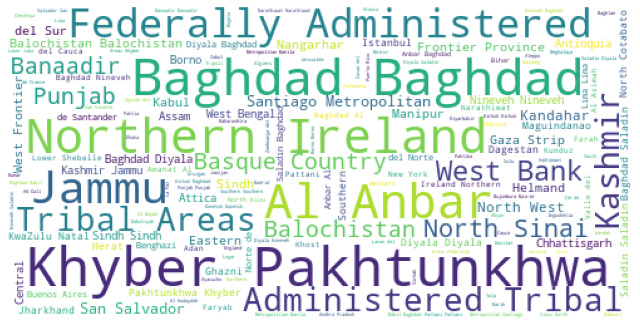

In [58]:
#!pip3 install wordcloud
from wordcloud import WordCloud
from scipy import signal
cities=df.State.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [ ]:
#Taking only 30 countries for visualization of heatmap properly
df_copy = df.sort_values(by='casualities',ascending=False)[:30]

In [ ]:
df_copy.corr()

,Year,Month,Day,Country_Code,Region_Code,Latitude,Longitude,AttackType_Code,Targtype_Code,Targsubtype_code,Group_Name,Weaptype1_Code,Weapsubtype1_Code,Killed,Wounded,casualities
Year,1.000000,0.143819,0.074797,0.100993,0.114363,0.325961,0.154874,0.174489,-0.179841,-0.120128,0.148334,-0.303322,-0.207811,-0.094044,-0.092916,-0.143320
Month,0.143819,1.000000,-0.057053,-0.154560,0.280146,0.004843,-0.075305,-0.033065,0.069722,0.053933,-0.230971,0.399676,0.367944,0.360414,-0.146261,0.249835
Day,0.074797,-0.057053,1.000000,-0.008747,-0.346549,0.089764,0.075206,-0.130257,-0.105098,-0.107421,-0.020564,0.126675,0.176401,-0.359652,-0.130895,-0.414320
Country_Code,0.100993,-0.154560,-0.008747,1.000000,0.097642,-0.306034,-0.094237,0.758970,0.023245,0.067151,0.243545,-0.176231,-0.187295,0.147824,0.047886,0.166768
Region_Code,0.114363,0.280146,-0.346549,0.097642,1.000000,-0.243866,0.044368,0.087836,0.130232,0.082213,-0.124455,0.151738,0.015652,0.269773,-0.131738,0.173735
Latitude,0.325961,0.004843,0.089764,-0.306034,-0.243866,1.000000,-0.132663,-0.003479,-0.002045,0.005364,0.112236,-0.092735,0.010485,-0.038788,-0.090711,-0.090337
Longitude,0.154874,-0.075305,0.075206,-0.094237,0.044368,-0.132663,1.000000,0.013047,0.115003,0.111788,0.236100,-0.168637,-0.049024,-0.115414,-0.083154,-0.157484
AttackType_Code,0.174489,-0.033065,-0.130257,0.758970,0.087836,-0.003479,0.013047,1.000000,-0.005978,0.044876,0.259065,-0.183186,0.031493,0.122169,0.270226,0.275304
Targtype_Code,-0.179841,0.069722,-0.105098,0.023245,0.130232,-0.002045,0.115003,-0.005978,1.000000,0.985932,0.130117,0.087412,-0.043080,-0.035188,-0.004371,-0.035509
Targsubtype_code,-0.120128,0.053933,-0.107421,0.067151,0.082213,0.005364,0.111788,0.044876,0.985932,1.000000,0.141410,0.009551,-0.102828,-0.086776,0.020455,-0.068950


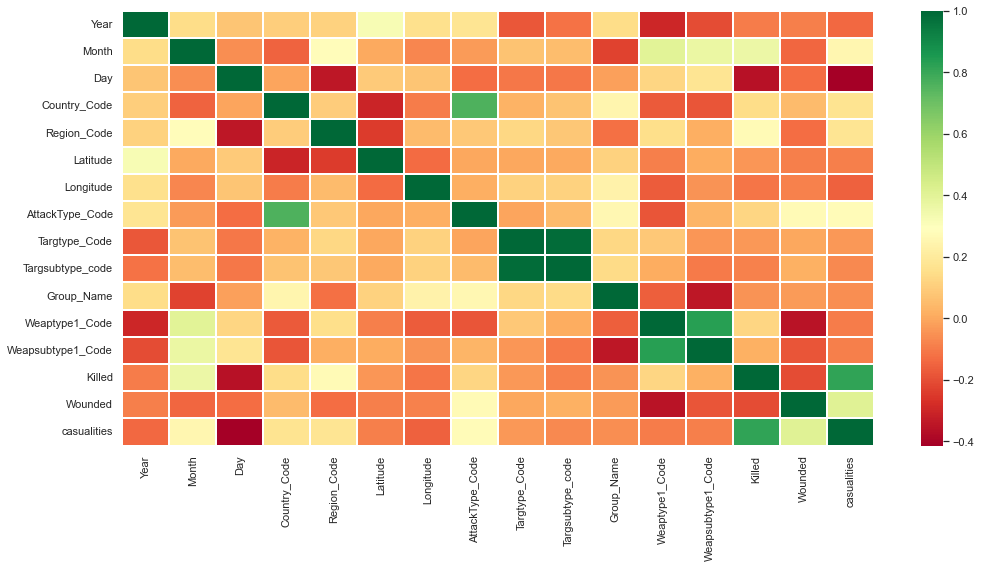

In [61]:
#Generating c for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(df_copy.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()


In [66]:
attack_country = df.Country_Name.value_counts()[:15]
attack_country

Iraq              21253
Pakistan          12335
Afghanistan       11204
India             10520
Philippines        6200
Colombia           5539
Peru               3536
Yemen              3480
Thailand           3434
Turkey             3356
Nigeria            3172
Somalia            3155
United Kingdom     2816
El Salvador        2457
United States      2410
Name: Country_Name, dtype: int64

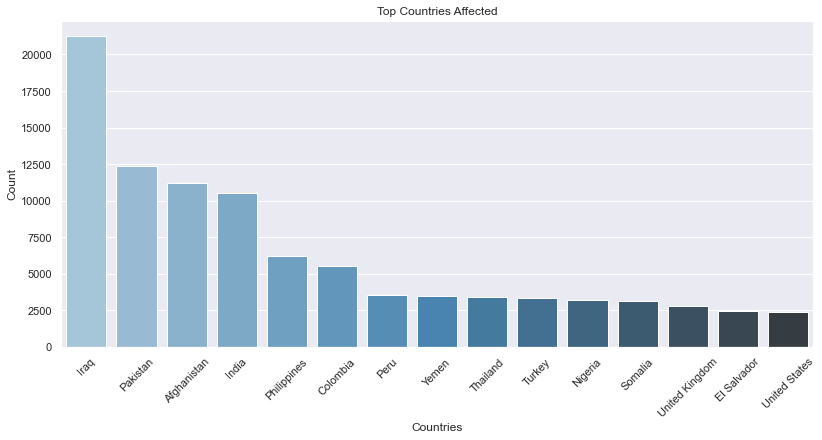

In [67]:
## Countries affected by terrorism
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()


In [71]:
attack_groups = df.Group_Name.value_counts()[1:15]
attack_groups

2617    25402
1899     7933
153      7761
2467     6053
1221     4668
921      3610
861      3423
1498     1864
595      1790
732      1655
2274     1631
1626     1516
521      1450
1149     1444
Name: Group_Name, dtype: int64

<AxesSubplot:xlabel='Year'>

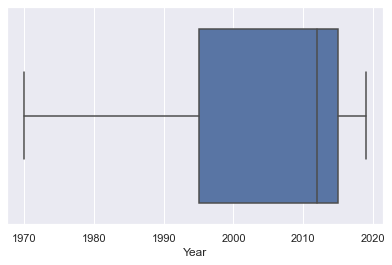

In [20]:
sns.boxplot(x=df['Year'])

In [21]:
df.describe()

,Year,Month,Day,Country_Code,Region_Code,Latitude,Longitude,AttackType_Code,Targtype_Code,Targsubtype_code,Weaptype1_Code,Weapsubtype1_Code,Killed,Wounded
count,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000
mean,2005.559861,6.449863,15.567768,128.737048,7.342989,23.867028,33.957499,2.818625,7.945608,46.326720,5.783966,10.976605,2.227682,3.411989
std,12.483767,3.388794,8.795389,102.708340,2.827832,17.586545,55.025288,1.367057,6.264920,30.266787,0.861670,6.528639,8.511864,18.254371
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-157.858333,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,1995.000000,4.000000,8.000000,92.000000,6.000000,12.191850,13.182591,2.000000,3.000000,22.000000,5.000000,5.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,101.000000,7.000000,31.600629,44.341636,3.000000,4.000000,34.000000,6.000000,11.000000,1.000000,0.000000
75%,2015.000000,9.000000,23.000000,160.000000,10.000000,34.438094,69.831708,3.000000,14.000000,73.000000,6.000000,16.000000,2.000000,2.000000
max,2019.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,178.441900,9.000000,22.000000,113.000000,9.000000,31.000000,1180.000000,4000.000000
